made some mistakes previously with fitting to the PCA multple times. Will be visualizing all the datasets of the HBA here.

In [1]:
#importing libraries
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
import requests
import json
import sys

In [2]:
#helping make the seaborn plots prettier
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=2)
sns.set_style('whitegrid')

Reading in all hba data sets

In [3]:
#nist dataset
webscraped_hba = pd.read_csv('../pubchem/webscrapped_hba.csv')

In [4]:
webscraped_hba

,HBA,CID
0,tetrabutylammonium chloride,70681
1,methyltriphenylphosphonium bromide,74505
2,benzyltriphenylphosphonium chloride,70671
3,trimethylbenzylammonium chloride,5963
4,tetraethylammonium chloride,5946
5,benzyltripropylammonium chloride,6097067
6,benzyltributylammonium chloride,159952
7,tetrapropylammonium bromide,74745
8,tetrapropylammonium chloride,79880
9,tetraoctylammonium bromide,2734117


Need smiles for this set

In [5]:
#adding path to pubchem folder which contains the get_properties function
sys.path.insert(0,'../pubchem/')

In [6]:
from get_properties import get_properties

In [7]:
webscraped_hba = get_properties(webscraped_hba, 'canonical_smiles', 'CID', 'HBA_' )

In [8]:
webscraped_hba

,HBA,CID,HBA_CanonicalSMILES
0,tetrabutylammonium chloride,70681,CCCC[N+](CCCC)(CCCC)CCCC.[Cl-]
1,methyltriphenylphosphonium bromide,74505,C[P+](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3.[Br-]
2,benzyltriphenylphosphonium chloride,70671,C1=CC=C(C=C1)C[P+](C2=CC=CC=C2)(C3=CC=CC=C3)C4...
3,trimethylbenzylammonium chloride,5963,C[N+](C)(C)CC1=CC=CC=C1.[Cl-]
4,tetraethylammonium chloride,5946,CC[N+](CC)(CC)CC.[Cl-]
5,benzyltripropylammonium chloride,6097067,CCC[N+](CCC)(CCC)CC1=CC=CC=C1.[Cl-]
6,benzyltributylammonium chloride,159952,CCCC[N+](CCCC)(CCCC)CC1=CC=CC=C1.[Cl-]
7,tetrapropylammonium bromide,74745,CCC[N+](CCC)(CCC)CCC.[Br-]
8,tetrapropylammonium chloride,79880,CCC[N+](CCC)(CCC)CCC.[Cl-]
9,tetraoctylammonium bromide,2734117,CCCCCCCC[N+](CCCCCCCC)(CCCCCCCC)CCCCCCCC.[Br-]


In [9]:
#Expanded dataset afetr retrieving similar compounds from pubchem
similar_hba = pd.read_csv('../pubchem/similar_compiled_HBA.csv')

In [10]:
similar_hba

,HBA_cid,HBA_smiles
0,23558,CCCCCCCCCC[N+](C)(C)CCCCCCCCCC.[Cl-]
1,8154,CCCCCCCCCCCCCCCC[N+](C)(C)C.[Cl-]
2,62581,CCCCCCCC[N+](C)(C)CCCCCCCC.[Cl-]
3,5946,CC[N+](CC)(CC)CC.[Cl-]
4,74236,CCCC[N+](CCCC)(CCCC)CCCC.[Br-]
5,21218,CCCCCCCC[N+](C)(CCCCCCCC)CCCCCCCC.[Cl-]
6,20708,CCCCCCCCCCCCCC[N+](C)(C)C.[Cl-]
7,8155,CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Cl-]
8,7879,CCCCCCCCCCCCCCCCCC[N+](C)(C)CCCCCCCCCCCCCCCCCC...
9,67553,CCCC[N+](CCCC)(CCCC)CCCC.[I-]


In [11]:
#basis set after applying engineering metrics
basis_hba = pd.read_csv('../pubchem/HBA_basis_set.csv')

In [12]:
basis_hba

,HBA_cid,HBA_smiles,Vendor Status,GHS_info,Health Score,SCALED HEALTH,HEALTH PI,Environmental Score,ENV SCALED,ENV PI,HBA_InChIKey,HBA_MolecularFormula,HBA_MolecularWeight,SCALED MW,MW PI,HBA_mp,TOTAL PI,RANK,MIN MW in set
0,75853,CCC[N+](C)(C)C.[Br-],True,"['H315', 'H319']",20,96,52.80,0,100.000000,18.000000,FCGQIZKUTMUWDC-UHFFFAOYSA-M,C6H16BrN,182.10,51.147721,13.809885,no mp data,84.609885,1,NaN
1,75854,CCCC[N+](C)(C)C.[Br-],True,"['H315', 'H319']",20,96,52.80,0,100.000000,18.000000,YGGIZRRNXQJOTI-UHFFFAOYSA-M,C7H18BrN,196.13,47.488910,12.822006,no mp data,83.622006,2,NaN
2,78872,CC[N+](C)(C)CC1=CC=CC=C1.[Cl-],True,"['H315', 'H319']",20,96,52.80,0,100.000000,18.000000,IUHDTQIYNQQIBP-UHFFFAOYSA-M,C11H18ClN,199.72,46.635289,12.591528,no mp data,83.391528,3,NaN
3,6209,C[N+](C)(C)CCO.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,SGMZJAMFUVOLNK-UHFFFAOYSA-M,C5H14ClNO,139.62,66.709640,18.011603,305,83.311603,4,NaN
4,71310335,C[N+](C)(C)CCO.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,SGMZJAMFUVOLNK-NWZHYJCUSA-M,C5H14ClNO,140.62,66.235244,17.883516,no mp data,83.183516,5,NaN
5,71309123,C[N+](C)(C)CCO.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,SGMZJAMFUVOLNK-LJJZSEGWSA-M,C5H14ClNO,140.62,66.235244,17.883516,no mp data,83.183516,5,NaN
6,74745,CCC[N+](CCC)(CCC)CCC.[Br-],True,Not classified as a hazardous substance,0,100,55.00,0,100.000000,18.000000,BGQMOFGZRJUORO-UHFFFAOYSA-M,C12H28BrN,266.26,34.980846,9.444828,252.2222222,82.444828,7,NaN
7,16213539,C[N+](C)(C)CCO.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,SGMZJAMFUVOLNK-KYRNGWDOSA-M,C5H14ClNO,148.68,62.644606,16.914044,no mp data,82.214044,8,NaN
8,82326,CC[N+](C)(CC)CC.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,NIUZJTWSUGSWJI-UHFFFAOYSA-M,C7H18ClN,151.68,61.405591,16.579509,no mp data,81.879509,9,NaN
9,24951,CCCCCCCCCC[N+](C)(C)C.[Cl-],True,"['H315', 'H319']",20,96,52.80,0,100.000000,18.000000,HXWGXXDEYMNGCT-UHFFFAOYSA-M,C13H30ClN,235.84,39.492877,10.663077,no mp data,81.463077,10,NaN


Here are the functions we will define that will create "fingerprints" for the chemicals. These fingerprints are sort of a way to digitize the chemical structure so this way we can look at similarities/differences and visualize them on plots. The SMILES string will be used to grab the fingerprints from rdkit.

In [13]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol == None:                  #added this in to skip None as they returned sometimes in the line before
            pass
        else:
            fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

Grabbing the fingerprints

In [14]:
#webscrapped set
web_hba_fp_list = fp_list_from_smiles_list(webscraped_hba.HBA_CanonicalSMILES)

#expanded set
similar_hba_fp_list = fp_list_from_smiles_list(similar_hba.HBA_smiles)

#basis set
basis_hba_fp_list = fp_list_from_smiles_list(basis_hba.HBA_smiles)

100%|██████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<00:00, 4415.33it/s]


Creating the PCA variable, using 2048 bit fingerprint and 2 PC

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 

Fitting the fingerprints to the PCA

In [18]:
#webscrapped set
web_hba_crds = pca.fit_transform(web_hba_fp_list)

#expanded set
similar_hba_crds = pca.transform(similar_hba_fp_list)  #take off "fit" so it uses components from first dataset

#basis set
basis_hba_crds = pca.transform(basis_hba_fp_list)

Saving into dataframes

In [19]:
#webscrapped set
web_hba_crds_df = pd.DataFrame(web_hba_crds,columns=["PC_1","PC_2"])

#expanded set
similar_hba_crds_df = pd.DataFrame(similar_hba_crds, columns=["PC_1","PC_2"])

#basis set
basis_hba_crds_df = pd.DataFrame(basis_hba_crds, columns=["PC_1","PC_2"])

Plotting

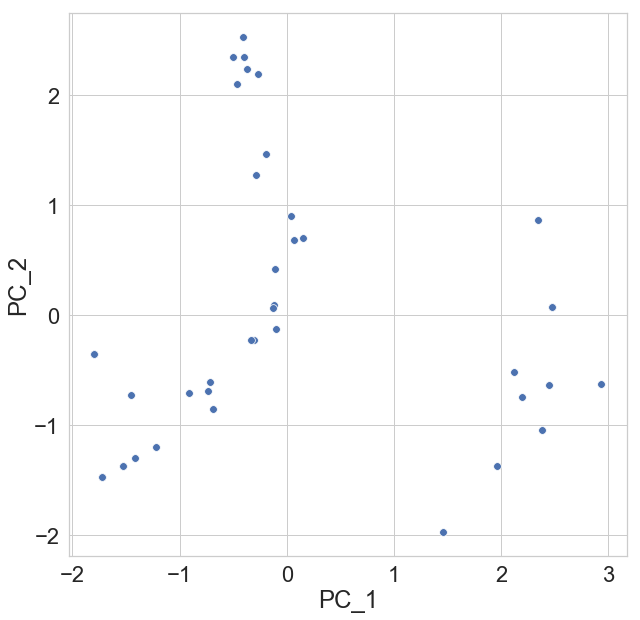

In [41]:
#webscrapped set
ax1 = sns.scatterplot(data=web_hba_crds_df,x="PC_1",y="PC_2", s = 60)
plt.savefig('hba_webscrapped_space.png')
plt.show()

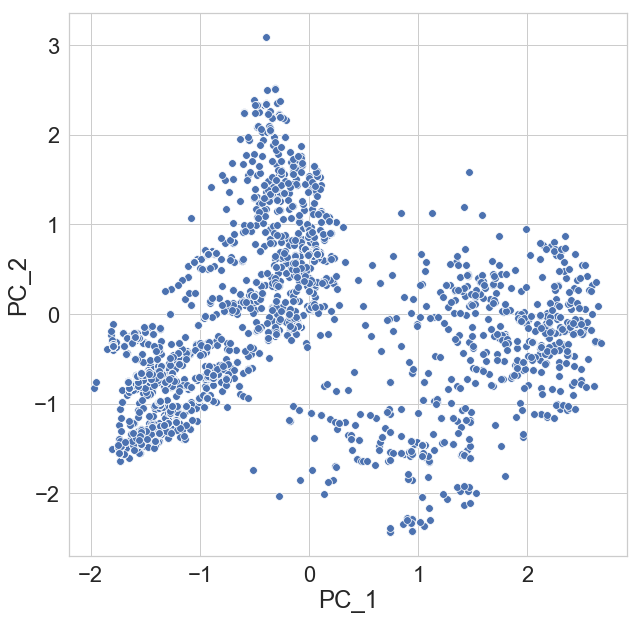

In [42]:
#expanded set
ax2 = sns.scatterplot(data=similar_hba_crds_df,x="PC_1",y="PC_2", s = 60)
plt.savefig('hba_expanded_space.png')
plt.show()

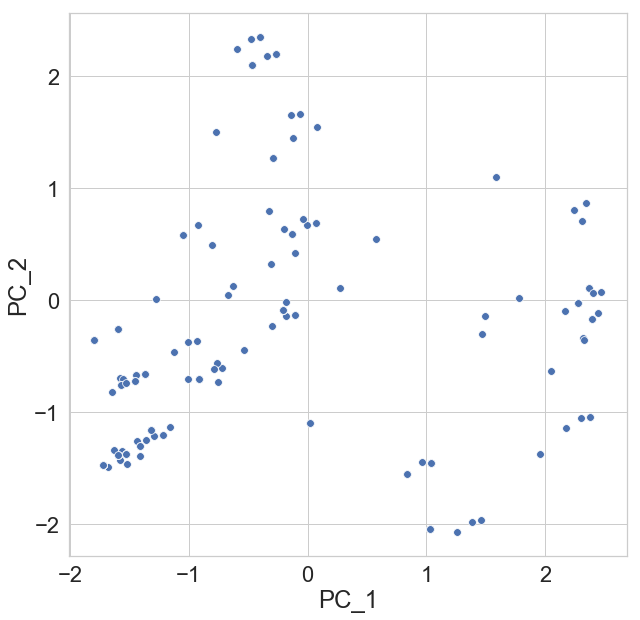

In [43]:
#basis_set
ax3 = sns.scatterplot(data=basis_hba_crds_df,x="PC_1",y="PC_2", s = 60)
plt.savefig('hba_basis_space.png')
plt.show()

If we want to further anlyze the basis set plot by looking at the diversity of the candiates by their structures, we will need a better variance as currently it is at 37%.

In [27]:
var = np.sum(pca.explained_variance_ratio_)
var

0.3721623738673522

Let's see how the variance changes with the number of components.

In [28]:
def evaluate_components(fp_list):
    res = []
    for n_comp in tqdm(range(2,50)): 
        pca = PCA(n_components=n_comp)
        crds = pca.fit_transform(fp_list) 
        var = np.sum(pca.explained_variance_ratio_)
        res.append([n_comp,var])
    return res


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 66.83it/s]


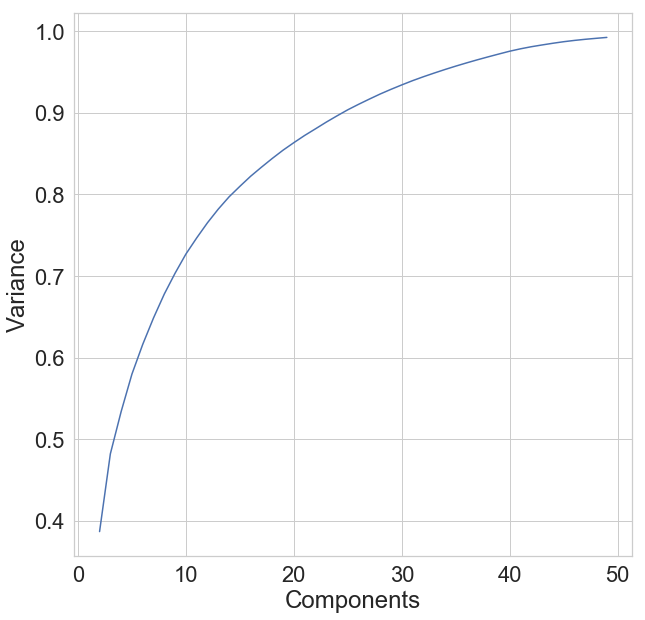

In [29]:
# Run the function above on our fingerprint list
basis_hba_comp_res = evaluate_components(basis_hba_fp_list)

#Put these results into a dataframe
basis_hba_res_df = pd.DataFrame(basis_hba_comp_res,columns=["Components","Variance"])

#Make a line plot of the number of components vs the variance explained
ax4 = sns.lineplot(data=basis_hba_res_df,x="Components",y="Variance")

Variance seems to level off after 50 components. We will make a new PCA with 50 principal components, and then use t-distributed stochastic neighbor embedding to reduce the dimensions.

In [30]:
hba_pca = PCA(n_components=50)
hba_crds = hba_pca.fit_transform(basis_hba_fp_list)

Use t-sne to reduce dimensions

In [31]:
from sklearn.manifold import TSNE
%time hba_crds_embedded = TSNE(n_components=2).fit_transform(hba_crds)

Wall time: 690 ms


In [32]:
#adding to df
hba_tsne_df = pd.DataFrame(hba_crds_embedded,columns=["X","Y"])
hba_tsne_df.head()

,X,Y
0,-2.079015,2.557467
1,0.974655,2.290956
2,-1.901964,-8.801932
3,-9.527514,-2.196831
4,-9.527011,-2.196431


We can also add the ranking from the basis set after applying the engineering metrics performance. The dataset was already in order of ranking so the length of the fp list will give us the ranking.

In [33]:
len(basis_hba_fp_list)

183

In [34]:
basis_hba_fp_rank = list(range(1, 184))

In [35]:
hba_tsne_df['rank'] = basis_hba_fp_rank

In [37]:
hba_tsne_df.head()

,X,Y,rank
0,-2.079015,2.557467,1
1,0.974655,2.290956,2
2,-1.901964,-8.801932,3
3,-9.527514,-2.196831,4
4,-9.527011,-2.196431,5


We can plot this out with a colorbar to show the ranking as well

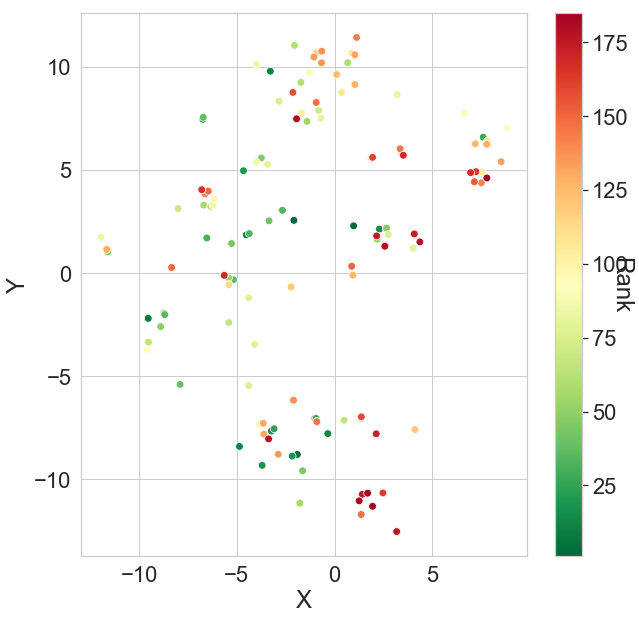

In [44]:
norm = plt.Normalize(basis_hba['RANK'].min(), basis_hba['RANK'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)

sm.set_array([])


ax = sns.scatterplot(data=hba_tsne_df,x="X",y="Y", hue = 'rank', palette = "RdYlGn_r", legend = False, s = 60 )


cbar = plt.colorbar(sm)
cbar.set_label('Rank', rotation = 270)

plt.savefig('hba_basis_set_ranked.png')
plt.show()

In [45]:
hba_tsne_df.to_csv('hba_tsne_df.csv', index = False)